In [3]:
# 1. Load the Titanic Dataset

import seaborn as sns
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Load the dataset 
titanic_data = pd.read_csv('huge_1M_titanic.csv')

# Preview the first few rows
print(titanic_data.head())


   PassengerId  Survived  Pclass                         Name     Sex   Age  \
0         1310         1       1  Name1310, Miss. Surname1310  female   NaN   
1         1311         0       3   Name1311, Col. Surname1311    male  29.0   
2         1312         0       3    Name1312, Mr. Surname1312    male  20.0   
3         1313         0       3    Name1313, Mr. Surname1313    male  27.0   
4         1314         0       3    Name1314, Mr. Surname1314    male  32.0   

   SibSp  Parch            Ticket       Fare Cabin Embarked  
0      0      0  SOTON/O2 3101272  76.760165   NaN        C  
1      0      0            223596  10.193097   NaN        S  
2      0      0             54636  12.029416   C83        C  
3      0      0          PC 17760  13.429448   NaN        S  
4      0      0            364512   4.840769   E33        C  


In [ ]:
# 2. Check Data Summary and Missing Values


# Shape of the dataset
print("Shape of the dataset:", titanic_data.shape)

# Columns in the dataset
print("\nColumns in the dataset:\n", titanic_data.columns.tolist())

# Check for missing values
print("\nMissing values in each column:\n", titanic_data.isnull().sum())

# Data types of each column
print("\nData types of each column:\n", titanic_data.dtypes)

# Summary statistics
print("\nSummary Statistics:\n", titanic_data.describe(include='all'))


Shape of the dataset: (1000000, 12)

Columns in the dataset:
 ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Missing values in each column:
 PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age            198600
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin          770195
Embarked         2240
dtype: int64

Data types of each column:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Summary Statistics:
          PassengerId        Survived         Pclass  \
count   1.000000e+06  1000000.000000  1000000.00000   
unique           NaN             NaN            NaN   
top  

In [5]:
# 3. Missing values count

missing_counts = titanic_data.isnull().sum()

# Percentage of missing values
missing_percent = (missing_counts / len(titanic_data)) * 100

# Combine both into a single DataFrame for better readability
missing_info = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage (%)': missing_percent.round(2)
})

# Display missing data summary
print("\nMissing Data Summary:\n")
print(missing_info[missing_info['Missing Values'] > 0])



Missing Data Summary:

          Missing Values  Percentage (%)
Age               198600           19.86
Cabin             770195           77.02
Embarked            2240            0.22


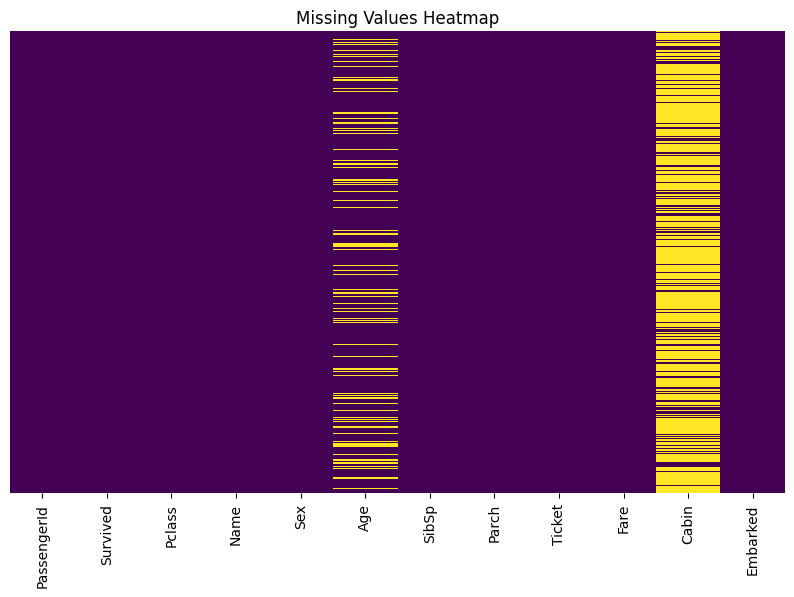

In [7]:
# 4. Heatmap

# create the heatmap
plt.figure(figsize=(10, 6))

sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)

plt.title('Missing Values Heatmap')

plt.show()

In [10]:
# 5. Impute the Missing Values 

# load the necessary libraries
from sklearn.impute import SimpleImputer
import pandas as pd

# Load data
titanic_data = pd.read_csv('huge_1M_titanic.csv')
titanic_data_filled = titanic_data.copy()

# Separate the columns
numerical_cols = titanic_data_filled.select_dtypes(include=['number']).columns
categorical_cols = titanic_data_filled.select_dtypes(exclude=['number']).columns

# Impute numerical with mean
num_imputer = SimpleImputer(strategy='mean')
titanic_data_filled[numerical_cols] = num_imputer.fit_transform(titanic_data_filled[numerical_cols])

# Impute categorical with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
titanic_data_filled[categorical_cols] = cat_imputer.fit_transform(titanic_data_filled[categorical_cols])

# Final check
missing_summary = titanic_data_filled.isnull().sum()
print("\nMissing values after imputation:")
print(missing_summary[missing_summary > 0] if missing_summary.sum() > 0 else "No missing values remain.")



Missing values after imputation:
No missing values remain.



Survival Count:
Survived
0.0    618319
1.0    381681
Name: count, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9040\3085748364.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=titanic_data_filled, palette='Set2')


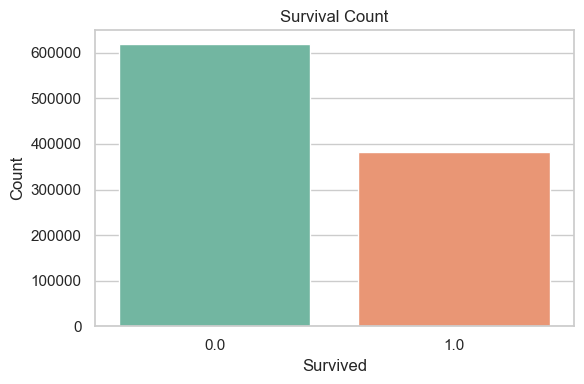


Pclass Distribution:
Pclass
3.0    553319
1.0    242069
2.0    204612
Name: count, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9040\3085748364.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=titanic_data_filled, palette='Set3')


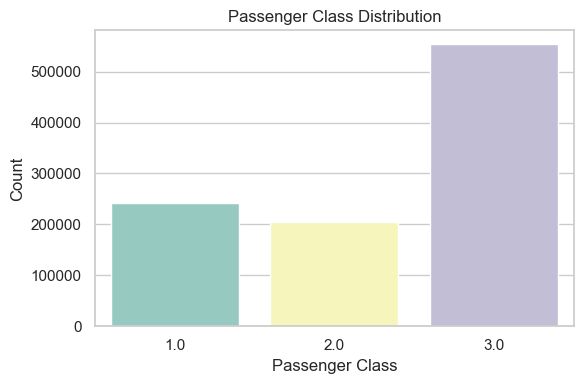


Age Statistics:
count    1000000.000000
mean          29.280339
std           11.409424
min            0.000000
25%           24.000000
50%           29.280339
75%           35.000000
max          114.000000
Name: Age, dtype: float64


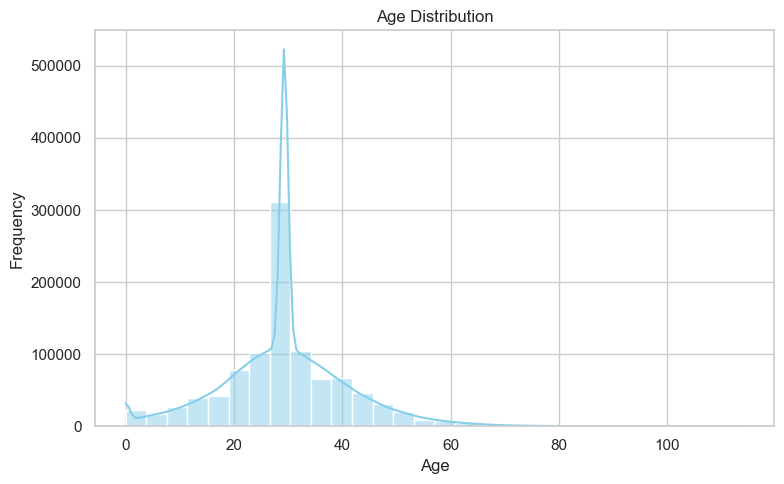


Sex Distribution:
Sex
male      648840
female    351160
Name: count, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9040\3085748364.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=titanic_data_filled, palette='coolwarm')


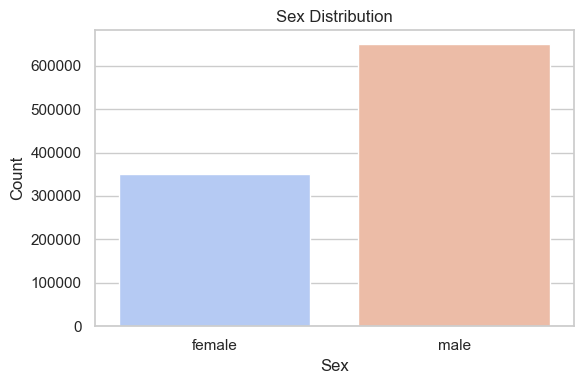

In [12]:
# 6. Univariate Analysis

# load the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style
sns.set(style='whitegrid')

# --- Analyze 'survived' ---
print("\nSurvival Count:")
print(titanic_data_filled['Survived'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=titanic_data_filled, palette='Set2')
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# --- Analyze 'pclass' ---
print("\nPclass Distribution:")
print(titanic_data_filled['Pclass'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', data=titanic_data_filled, palette='Set3')
plt.title('Passenger Class Distribution')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# --- Analyze 'age' ---
print("\nAge Statistics:")
print(titanic_data_filled['Age'].describe())

plt.figure(figsize=(8, 5))
sns.histplot(data=titanic_data_filled, x='Age', bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# --- Analyze 'sex' ---
print("\nSex Distribution:")
print(titanic_data_filled['Sex'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=titanic_data_filled, palette='coolwarm')
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



Survival by Gender:
 Sex     Survived
female  1.0         260970
        0.0          90190
male    0.0         528129
        1.0         120711
Name: count, dtype: int64


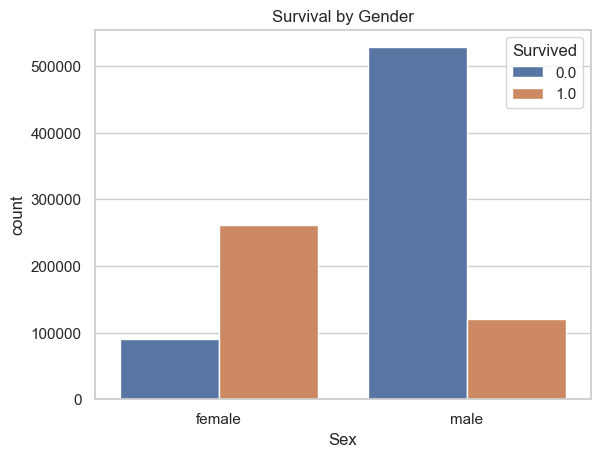


Survival by Passenger Class:
 Pclass  Survived
1.0     1.0         151401
        0.0          90668
2.0     0.0         106998
        1.0          97614
3.0     0.0         420653
        1.0         132666
Name: count, dtype: int64


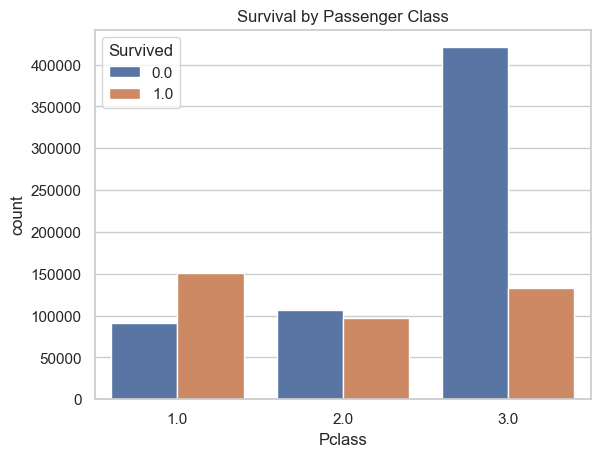

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15432\3250750331.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("\nSurvival by Age Group:\n", titanic_data_filled.groupby('age_group')['Survived'].value_counts())



Survival by Age Group:
 age_group  Survived
Child      0.0          75431
           1.0          57423
Adult      0.0         534560
           1.0         313967
Senior     0.0           3251
           1.0           1334
Name: count, dtype: int64


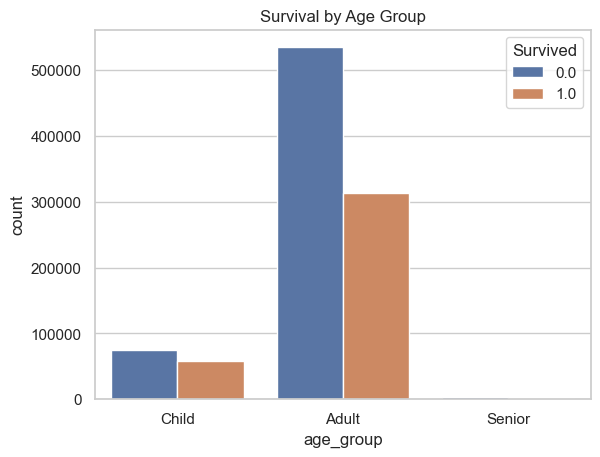


Survival by Gender and Class:
 Sex     Pclass  Survived
female  1.0     1.0         101756
                0.0           2787
        2.0     1.0          78769
                0.0           6522
        3.0     0.0          80881
                1.0          80445
male    1.0     0.0          87881
                1.0          49645
        2.0     0.0         100476
                1.0          18845
        3.0     0.0         339772
                1.0          52221
Name: count, dtype: int64


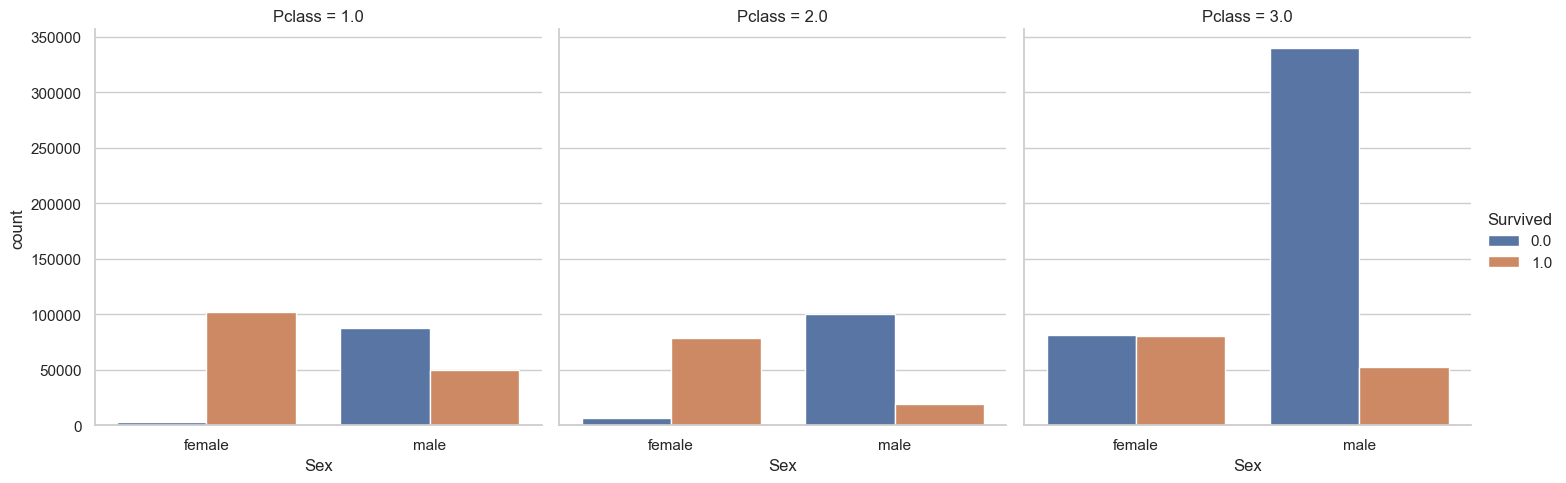

In [ ]:
# 7. Bivariate Analysis

# Analyze survival based on gender

print("\nSurvival by Gender:\n", titanic_data_filled.groupby('Sex')['Survived'].value_counts())

sns.countplot(x='Sex', hue='Survived', data=titanic_data_filled)

plt.title('Survival by Gender')

plt.show()



# Analyze survival based on passenger class

print("\nSurvival by Passenger Class:\n", titanic_data_filled.groupby('Pclass')['Survived'].value_counts())

sns.countplot(x='Pclass', hue='Survived', data=titanic_data_filled)

plt.title('Survival by Passenger Class')

plt.show()



# Analyze survival based on Age groups (create Age bins)

titanic_data_filled['age_group'] = pd.cut(titanic_data_filled['Age'], bins=[0, 18, 65, 100], labels=['Child', 'Adult', 'Senior'])

print("\nSurvival by Age Group:\n", titanic_data_filled.groupby('age_group')['Survived'].value_counts())

sns.countplot(x='age_group', hue='Survived', data=titanic_data_filled)

plt.title('Survival by Age Group')

plt.show()



# Further exploration: Analyze survival based on combinations of factors
 
# Example: Survival based on gender and class

print("\nSurvival by Gender and Class:\n", titanic_data_filled.groupby(['Sex', 'Pclass'])['Survived'].value_counts())

sns.catplot(x='Sex', hue='Survived', col='Pclass', kind='count', data=titanic_data_filled)

plt.show()

Survival Rate by Gender:

sex
female    0.743166
male      0.186041
Name: survived, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9040\3845504403.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_survival_rate.index, y=gender_survival_rate.values, palette='Set2')


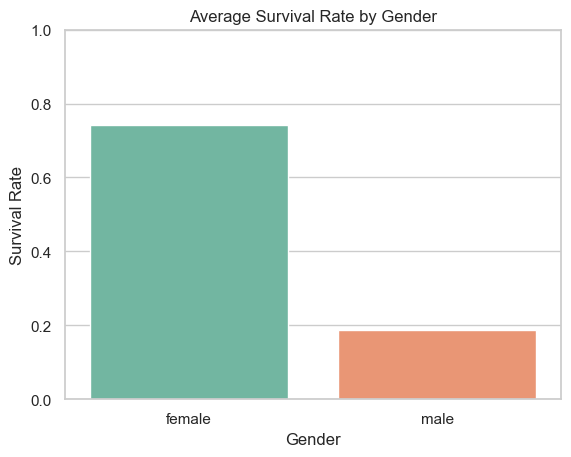


Survival Rate by Passenger Class:

pclass
1.0    0.625446
2.0    0.477069
3.0    0.239764
Name: survived, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9040\3845504403.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_survival_rate.index.astype(str), y=class_survival_rate.values, palette='Set3')


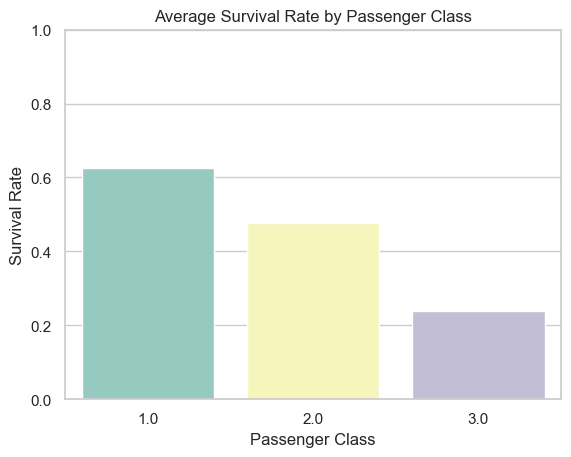


Survival Rate by Age Group:

age_group
Child     0.432226
Adult     0.370014
Senior    0.290949
Name: survived, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9040\3845504403.py:59: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival_rate = titanic_data_filled.groupby('age_group')['survived'].mean().sort_values(ascending=False)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9040\3845504403.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_survival_rate.index, y=age_survival_rate.values, palette='coolwarm')


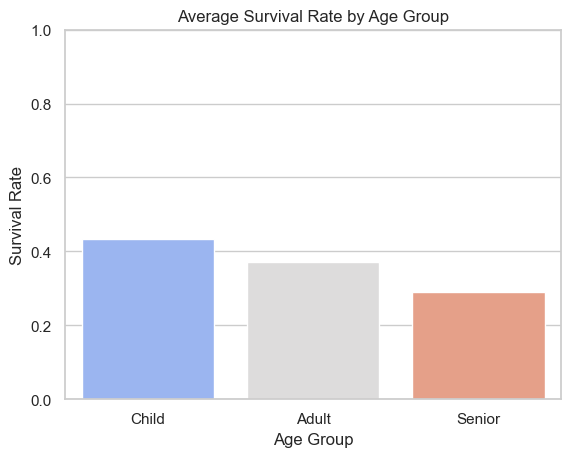

In [13]:
# 8. Insights from Analysis

# load the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Load the dataset
titanic_data = pd.read_csv('huge_1M_titanic.csv')

# Copy and clean column names
titanic_data_filled = titanic_data.copy()
titanic_data_filled.columns = titanic_data_filled.columns.str.lower()

# Separate numerical and categorical columns
num_cols = titanic_data_filled.select_dtypes(include=['number']).columns
cat_cols = titanic_data_filled.select_dtypes(exclude=['number']).columns

# Impute numerical with mean
num_imputer = SimpleImputer(strategy='mean')
titanic_data_filled[num_cols] = num_imputer.fit_transform(titanic_data_filled[num_cols])

# Impute categorical with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
titanic_data_filled[cat_cols] = cat_imputer.fit_transform(titanic_data_filled[cat_cols])

# Survival rate by gender
gender_survival_rate = titanic_data_filled.groupby('sex')['survived'].mean().sort_values(ascending=False)

print("Survival Rate by Gender:\n")
print(gender_survival_rate)

sns.barplot(x=gender_survival_rate.index, y=gender_survival_rate.values, palette='Set2')
plt.title('Average Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.ylim(0, 1)
plt.show()

# Survival rate by passenger class
class_survival_rate = titanic_data_filled.groupby('pclass')['survived'].mean().sort_values(ascending=False)

print("\nSurvival Rate by Passenger Class:\n")
print(class_survival_rate)

sns.barplot(x=class_survival_rate.index.astype(str), y=class_survival_rate.values, palette='Set3')
plt.title('Average Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.ylim(0, 1)
plt.show()

# Create age group bins
titanic_data_filled['age_group'] = pd.cut(
    titanic_data_filled['age'], bins=[0, 18, 65, 100], labels=['Child', 'Adult', 'Senior'])

# Survival rate by age group
age_survival_rate = titanic_data_filled.groupby('age_group')['survived'].mean().sort_values(ascending=False)

print("\nSurvival Rate by Age Group:\n")
print(age_survival_rate)

sns.barplot(x=age_survival_rate.index, y=age_survival_rate.values, palette='coolwarm')
plt.title('Average Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.ylim(0, 1)
plt.show()


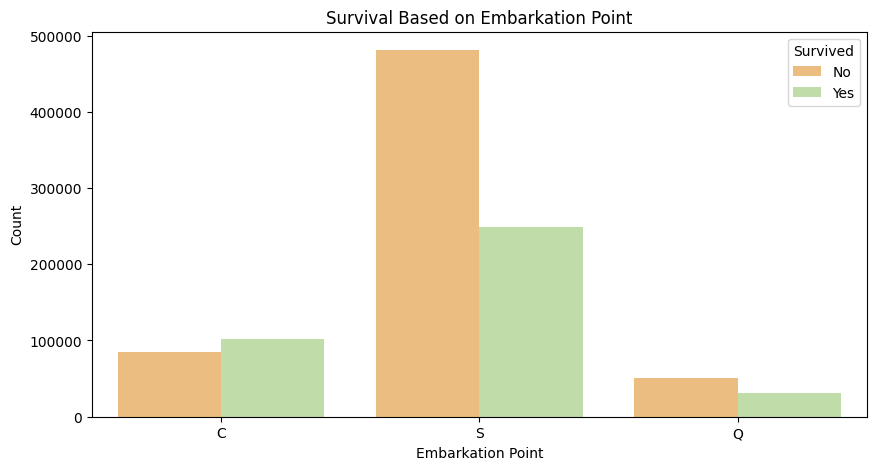

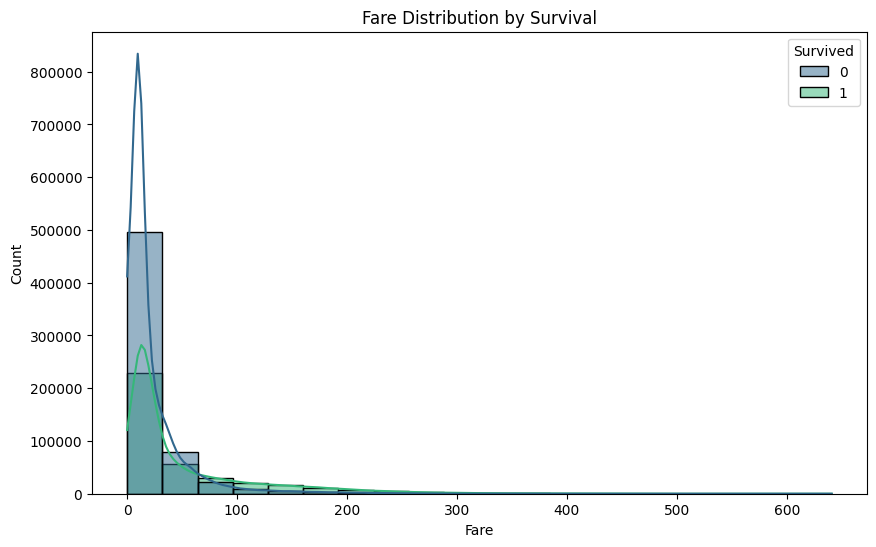

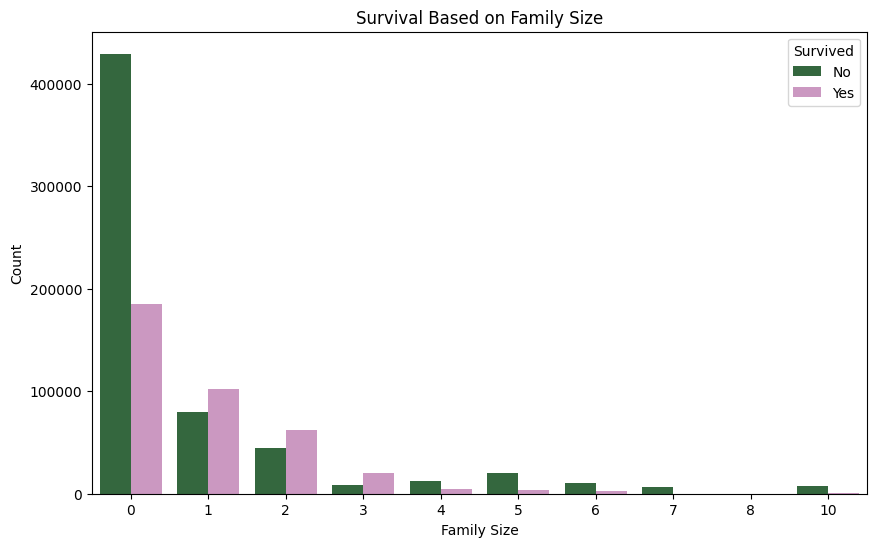

In [ ]:
# 9. Survival Analysis

# Survival Based on Embarkation Point

plt.figure(figsize=(10, 5))

sns.countplot(x='Embarked', hue='Survived', data=titanic_data, palette='Spectral')

plt.title('Survival Based on Embarkation Point')

plt.xlabel('Embarkation Point')

plt.ylabel('Count')

plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()



# Survival Based on Fare

plt.figure(figsize=(10, 6))

sns.histplot(titanic_data, x='Fare', hue='Survived', bins=20, kde=True, palette='viridis')

plt.title('Fare Distribution by Survival')

plt.xlabel('Fare')

plt.ylabel('Count')

plt.show()



# Family Size Analysis

titanic_data['family_size'] = titanic_data['SibSp'] + titanic_data['Parch']



plt.figure(figsize=(10, 6))

sns.countplot(x='family_size', hue='Survived', data=titanic_data, palette='cubehelix')

plt.title('Survival Based on Family Size')

plt.xlabel('Family Size')

plt.ylabel('Count')

plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()

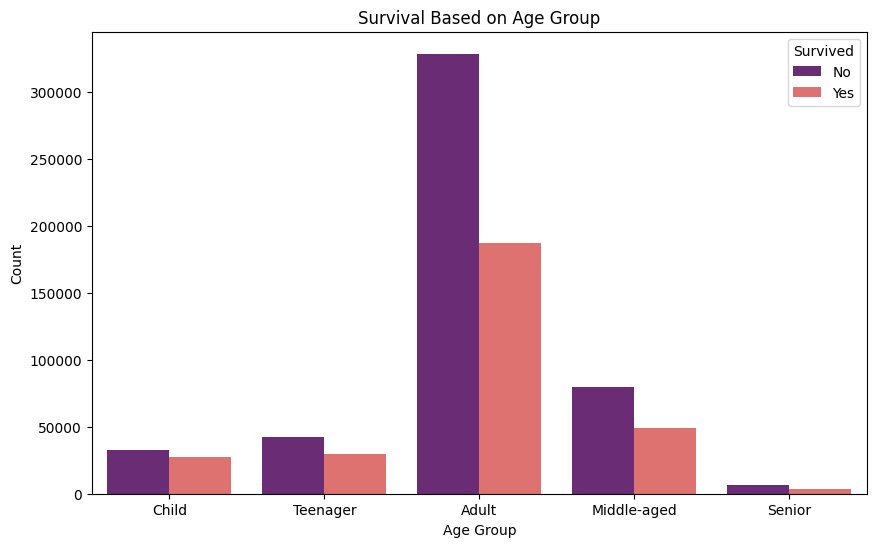

In [ ]:
# 10. Feature Engineering

# Create Age Group

bins = [0, 12, 18, 40, 60, 80]

labels = ['Child', 'Teenager', 'Adult', 'Middle-aged', 'Senior']

titanic_data['age_group'] = pd.cut(titanic_data['Age'], bins=bins, labels=labels)



# Visualize Survival by Age Group

plt.figure(figsize=(10, 6))

sns.countplot(x='age_group', hue='Survived', data=titanic_data, palette='magma')

plt.title('Survival Based on Age Group')

plt.xlabel('Age Group')

plt.ylabel('Count')

plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()

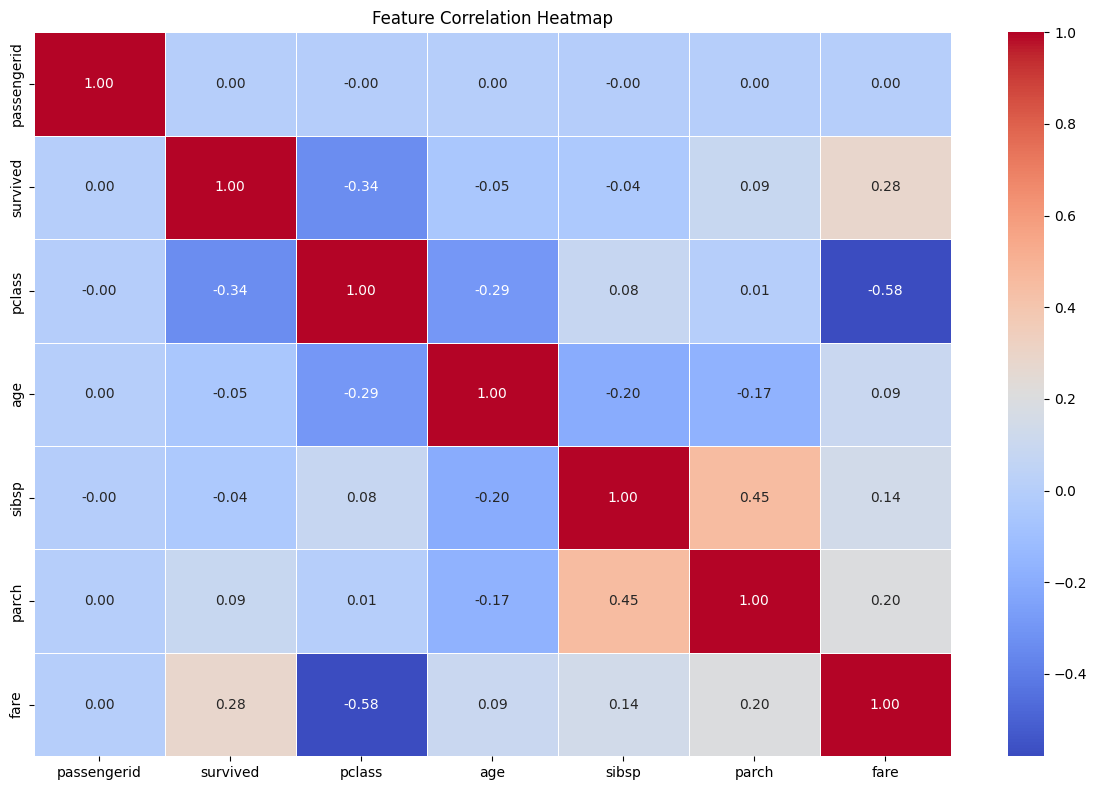

In [ ]:
# 11. Advanced Visualization (Heatmap)

# load the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Use the cleaned/imputed dataset
df = titanic_data_filled.copy()

# Ensure only numeric features are used for correlation
numeric_features = df.select_dtypes(include=np.number)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()
